In [1]:
import os

import dlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from PIL import Image

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
print(detector_hog)

150 200
rectangles[[(29, 37) (101, 109)]]
180 240
rectangles[[(35, 45) (121, 131)]]
210 280
rectangles[[(42, 54) (146, 158)]]
240 320
rectangles[[(54, 65) (158, 169)]]
270 360
rectangles[[(65, 79) (189, 203)]]
450 800
rectangles[[(79, 165) (337, 423)]]
540 960
rectangles[[(95, 198) (405, 508)]]
630 1120
rectangles[[(130, 267) (439, 577)]]
720 1280
rectangles[[(156, 280) (527, 651)]]
810 1440
rectangles[[(138, 286) (584, 732)]]
100 350
rectangles[]
120 420
rectangles[]
140 490
rectangles[]
160 560
rectangles[]
180 630
rectangles[]


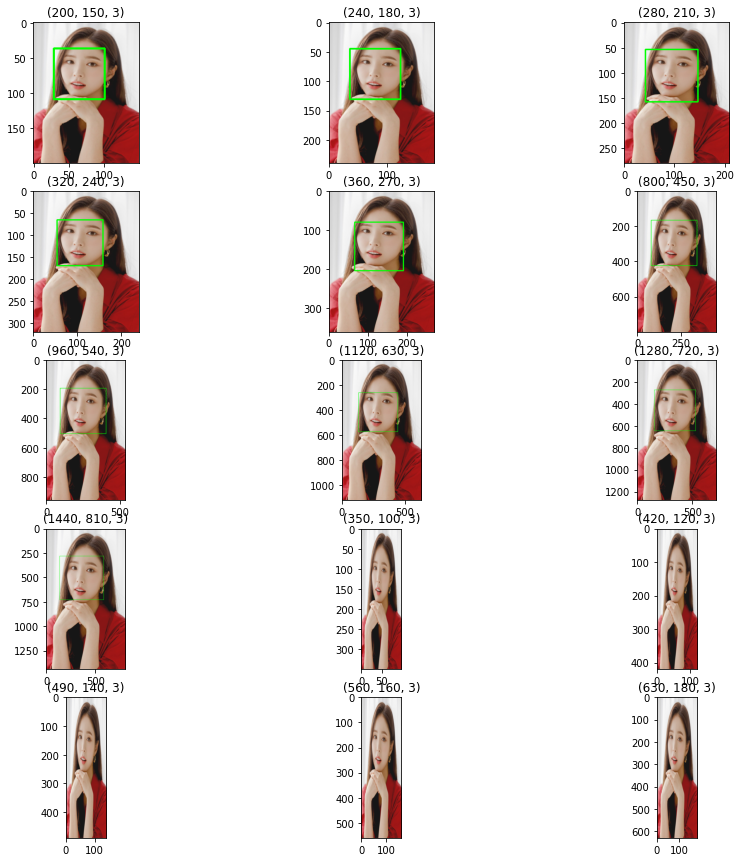

In [37]:
image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/image.png'
ratio = [(4,3), (16,9), (7,2)]

plt.figure(figsize=(15,15))
plt.axis('off')
results = []
result_idx = []
for i, (hor, ver) in enumerate(ratio):
    for j, scalar in enumerate(range(50, 100, 10)):
        print(ver*scalar, hor*scalar)
        img = Image.open(image_path)
        img = np.array(img.resize((ver*scalar, hor*scalar)))
        detecor_hog = dlib.get_frontal_face_detector()
        
        face_rect = detector_hog(img)
        print(face_rect)
        if face_rect:
            result_idx.append(5*i+j)
        for rect in face_rect:
            left = rect.left()
            top = rect.top()
            right = rect.right()
            bottom = rect.bottom()
            
            cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2)
        results.append(img)    
        plt.subplot(5, 3, 5*(i)+j+1)
        plt.imshow(img)
        plt.title(img.shape)
        
plt.show()

# 제대로 시작

In [198]:
import os

import dlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

from PIL import Image

In [199]:
img_size = (480, 640)

image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/image.png'
image = Image.open(image_path)
image = np.array(image.resize(img_size))
image_show = image.copy()
print(image.shape)

(640, 480, 3)


In [200]:
detecor_hog = dlib.get_frontal_face_detector()
face_detection = detector_hog(image, 1)

print(face_detection)

rectangles[[(118, 139) (304, 325)]]


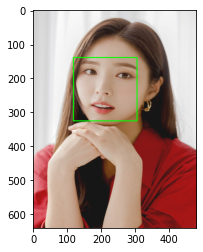

In [201]:
for rect in face_detection:
    left = rect.left()
    top = rect.top()
    right = rect.right()
    bottom = rect.bottom()

    cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 2)
plt.imshow(image)

In [202]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


[(131, 180), (127, 204), (127, 227), (130, 250), (135, 273), (144, 294), (156, 312), (172, 326), (193, 333), (219, 336), (248, 330), (275, 321), (299, 305), (315, 284), (327, 259), (336, 232), (343, 203), (138, 156), (150, 148), (166, 148), (182, 151), (197, 158), (232, 160), (253, 155), (275, 156), (297, 164), (313, 177), (209, 185), (206, 202), (201, 218), (197, 235), (183, 246), (190, 250), (199, 253), (210, 252), (220, 251), (151, 181), (163, 176), (177, 177), (187, 188), (174, 189), (160, 187), (244, 194), (259, 186), (274, 187), (287, 195), (274, 199), (259, 198), (168, 280), (178, 270), (189, 266), (198, 269), (208, 268), (224, 276), (240, 290), (222, 301), (206, 304), (196, 303), (186, 300), (176, 293), (173, 280), (189, 275), (198, 277), (208, 278), (235, 288), (207, 290), (197, 289), (188, 286)]


(-0.5, 479.5, 639.5, -0.5)

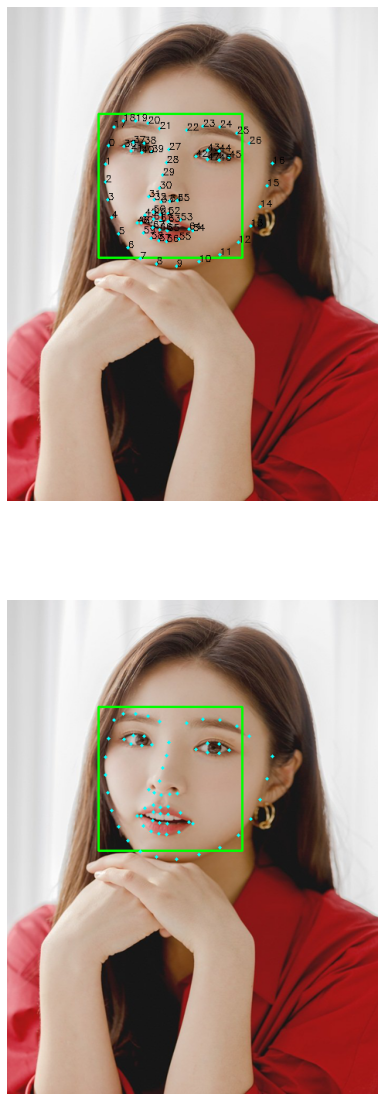

In [203]:
img = image.copy()
points = landmark_predictor(image, face_detection[0])
landmarks = list(map(lambda p: (p.x, p.y), points.parts()))
print(landmarks)

for text, landmark in enumerate(landmarks):
    cv2.circle(img, landmark, 2, (0, 255, 255), -1)
    cv2.circle(image, landmark, 2, (0, 255, 255), -1)
    cv2.putText(img, str(text), landmark, fontFace = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.4, color=(0,0,0))
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(image)
plt.axis("off")

In [204]:
nose_x = landmarks[30][0]
nose_y = landmarks[30][1]
face_width = face_detection[0].width()
face_height = face_detection[0].height()

def get_sticker(sticker_path, nose_x_y, face_width_height, shift_y=20):
    '''Parameters :(image_sticker, (nose_x, nose_y), (face_width, face_height))'''
    
    nose_x, nose_y = nose_x_y
    face_width, face_height = face_width_height
    
    sticker_size = (int(face_width), int(face_height))
    
    image_sticker = Image.open(sticker_path).convert('RGB')
    image_sticker = np.array(image_sticker.resize(sticker_size))
    
    sticker_x = int(nose_x - face_width//2)
    sticker_y = int(nose_y - 1.5 * face_height) - shift_y
    
    if sticker_x < 0:
        image_sticker = image_sticker[:, -sticker_x:]
        sticker_x = 0
    
    if sticker_y < 0:
        image_sticker = image_sticker[-sticker_y:, :]
        sticker_y = 0
    
    return image_sticker, sticker_x, sticker_y

104 0


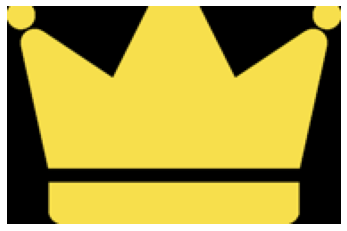

In [205]:
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/king.png'
image_sticker, sticker_x, sticker_y = get_sticker(sticker_path, (nose_x, nose_y), (face_width, face_height))
sticker_width, sticker_height = image_sticker.shape[1], image_sticker.shape[0]

print(sticker_x, sticker_y)
plt.imshow(image_sticker)
plt.axis('off')
plt.show()

In [206]:
print('Nose x, y: ', nose_x, nose_y)
print('Face width, height: ', face_width, face_height)
print('Sticker x, y: ', sticker_x, sticker_y)
print('Sticker width, height: ', image_sticker.shape[1], image_sticker.shape[0])

Nose x, y:  197 235
Face width, height:  187 187
Sticker x, y:  104 0
Sticker width, height:  187 122


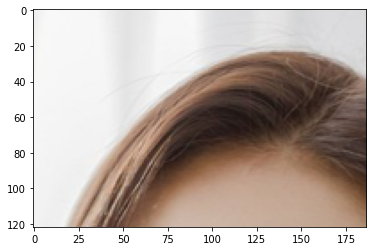

In [207]:
sticker_area = image[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width]
plt.imshow(sticker_area)

In [208]:
np.where(image_sticker==0,sticker_area,image_sticker)

array([[[  4,   3,   1],
        [179, 161,  55],
        [255, 234,  79],
        ...,
        [255, 234,  80],
        [178, 161,  54],
        [  4,   3,   1]],

       [[ 78,  71,  24],
        [251, 227,  77],
        [248, 223,  76],
        ...,
        [248, 223,  76],
        [251, 226,  77],
        [ 78,  71,  24]],

       [[205, 185,  64],
        [252, 227,  77],
        [247, 223,  76],
        ...,
        [247, 223,  76],
        [252, 227,  77],
        [205, 184,  61]],

       ...,

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [169, 135, 108],
        [167, 133, 105],
        [166, 131, 103]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [175, 141, 115],
        [172, 138, 111],
        [171, 136, 108]],

       [[242, 242, 242],
        [242, 242, 242],
        [242, 242, 242],
        ...,
        [176, 143, 119],
        [174, 140, 114],
        [172, 138, 111]]

In [209]:
image_show[sticker_y:sticker_y+sticker_height, sticker_x:sticker_x+sticker_width] = np.where(image_sticker==0,sticker_area,image_sticker)

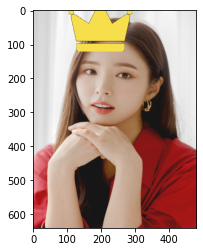

In [210]:
plt.imshow(image_show)

In [25]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [26]:
landmark_predictor

In [31]:
face_detection

rectangles[]

In [30]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
print(detector_hog)

In [29]:
points = landmark_predictor(image, face_detection[0])

IndexError: 

In [82]:
list_landmarks = []
for face in face_detection:
    points = landmark_predictor(image, face)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [ ]:
for hor, ver in 

In [29]:
img = Image.open(image_path)
#img = np.array(img.resize((700, 640)))
img = np.array(img)
img_show = img.copy()
print(type(img_show))

<class 'numpy.ndarray'>


In [34]:
face_rect = detector_hog(img, 1)
print(face_rect)

rectangles[[(118, 204) (504, 590)]]


In [35]:
for rect in face_rect:
    left = rect.left()
    top = rect.top()
    right = rect.right()
    bottom = rect.bottom()
    
    cv2.rectangle(img_show, (1, top), (right, bottom), (0, 255, 0), 2)

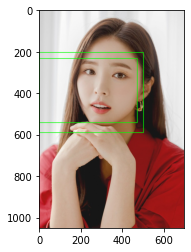

In [36]:
plt.imshow(img_show)

In [38]:
face_rect

rectangles[[(164, 95) (474, 405)]]

In [4]:
import os
image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(image_path)
type(img_bgr)

numpy.ndarray

In [22]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_shape = img_rbg.shape()
img
#img_rgb = cv2.resize(img_rgb, (700, 640))    # 640x360의 크기로 Resize

(1050, 700, 3)


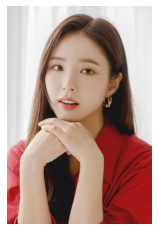

In [23]:
print(img_rgb.shape)
img_show = img_rgb.copy()
plt.imshow(img_show)
plt.axis('off')
plt.show()

In [24]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print(detector_hog)
print("🌫🛸")

🌫🛸


In [25]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)
print("🌫🛸")

rectangles[[(118, 204) (504, 590)]]
🌫🛸


rectangles[[(118, 204) (504, 590)]]


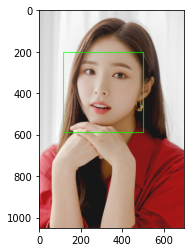

In [26]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

🌫🛸


68


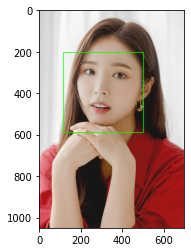

In [29]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # 640x360의 크기로 Resize

(640, 480, 3)


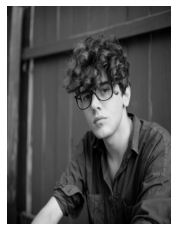

In [3]:
print(img_bgr.shape)
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.axis('off')
plt.show()

rectangles[[(184, 219) (339, 374)]]


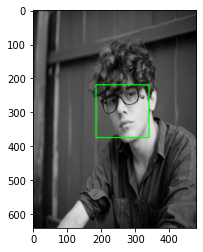

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_show)
plt.show()

In [12]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [14]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_bgr, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


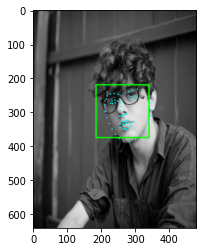

In [15]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show)
plt.show()